# Cross-Country Comparison
# Compare solar irradiance metrics across Benin, Sierra Leone, and Togo using cleaned datasets

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
from IPython.display import display, Markdown

In [37]:
benni_clean='C:/Users/hanif/Desktop/New folder/nifomohad-solar-challenge-week0/data/benin_cleaned.csv'
sierra_clean=r"C:\Users\hanif\Desktop\New folder\nifomohad-solar-challenge-week0\data\sierraleone_clean.csv"
togo_clean=r"C:\Users\hanif\Desktop\New folder\nifomohad-solar-challenge-week0\data\togo_clean.csv"

In [39]:
# Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.
benin = pd.read_csv(benni_clean)
sierra_leone = pd.read_csv(sierra_clean)
togo = pd.read_csv(togo_clean)
# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

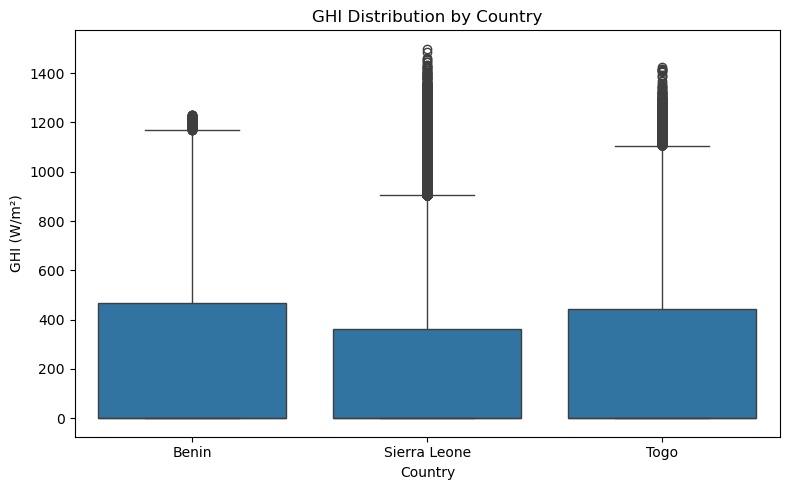

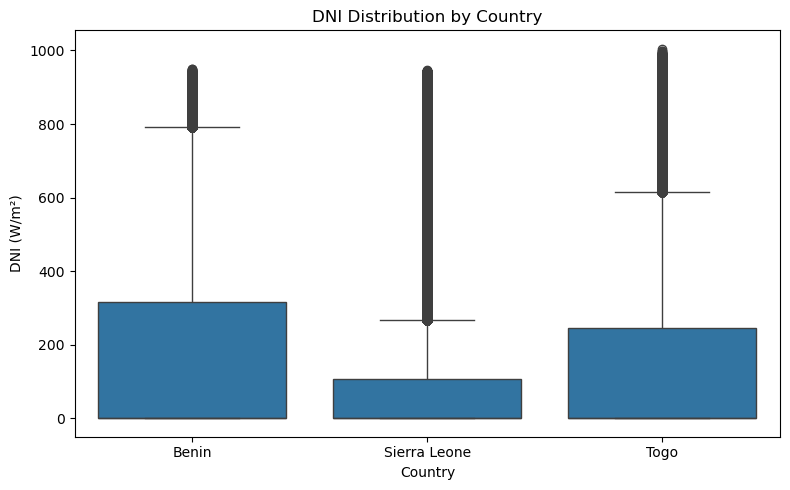

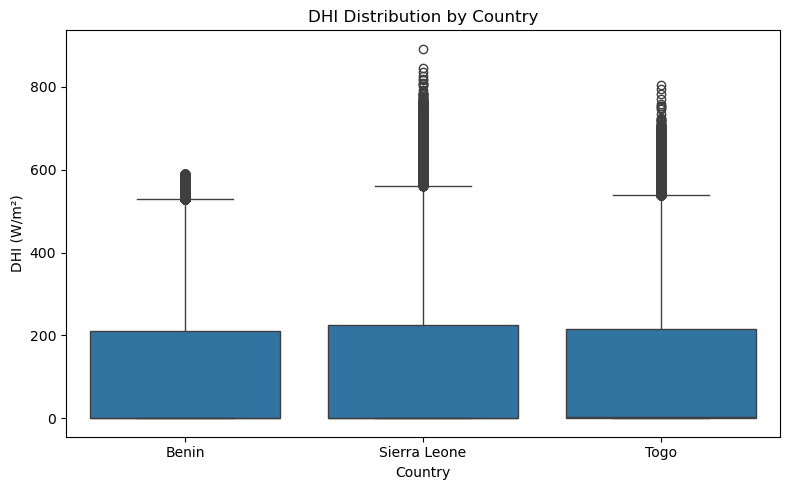

In [40]:
# Metrics to compare using Boxplots 
metrics = ['GHI', 'DNI', 'DHI']
# Boxplots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Country', y=metric)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.tight_layout()
    plt.show()

In [41]:
# Summary Table comparing mean, median, and standard deviation of GHI, DNI, and DHI across countries.
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
display(Markdown("Summary Table"))
display(summary)

Summary Table

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         237.48    0.6  327.17  167.14    0.0  261.94  113.17    0.4   
Sierra Leone  204.41    0.3  296.79  116.52    0.0  218.57  116.27    0.0   
Togo          231.72    2.1  321.69  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         151.66  
Sierra Leone  157.02  
Togo          156.52

In [43]:
# Statistical testing: ANOVA and Kruskal-Wallis for GHI
ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

display(Markdown(f"**One-way ANOVA p-value for GHI:** {anova_result.pvalue:.4f}"))
display(Markdown(f"**Kruskal–Wallis p-value for GHI:** {kruskal_result.pvalue:.4f}"))

**One-way ANOVA p-value for GHI:** 0.0000

**Kruskal–Wallis p-value for GHI:** 0.0000

In [47]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')


In [49]:
# Auto-generate 3 key observations
stats = df.groupby('Country').agg(GHI_mean=('GHI','mean'),
                                  GHI_median=('GHI','median'),
                                  GHI_std=('GHI','std'))
obs = []
obs.append(f"{stats['GHI_median'].idxmax()} shows the highest median GHI.")
obs.append(f"{stats['GHI_std'].idxmax()} has the greatest variability in GHI.")
obs.append(f"{stats['GHI_mean'].idxmax()} leads in mean GHI, reinforcing its advantage.")
for o in obs:
    print("-", o)


- Togo shows the highest median GHI.
- Benin has the greatest variability in GHI.
- Benin leads in mean GHI, reinforcing its advantage.


In [51]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')


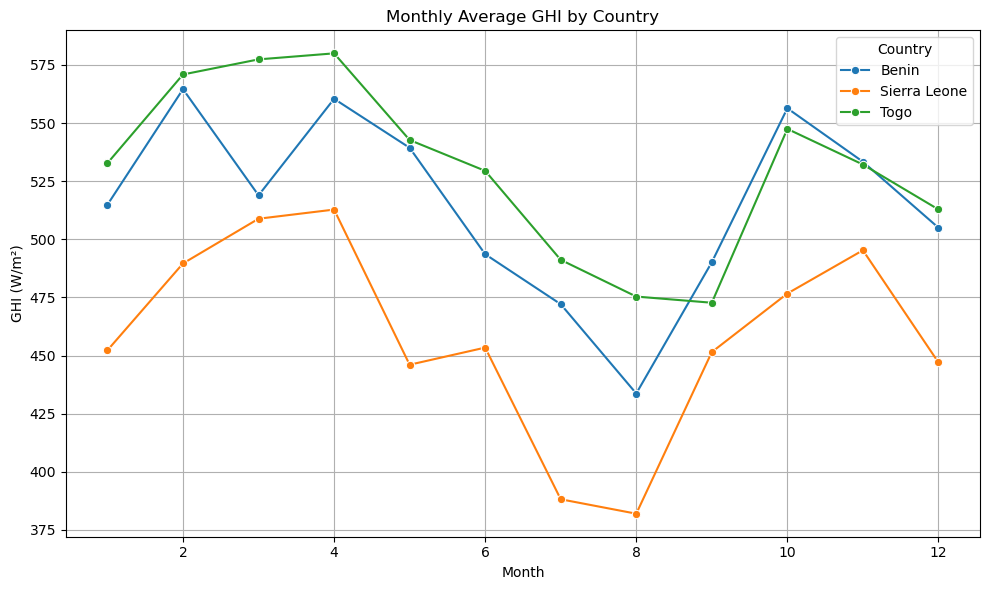

In [53]:

# Load datasets
benin_df = pd.read_csv(benni_clean, parse_dates=["Timestamp"])
sierra_df = pd.read_csv(sierra_clean, parse_dates=["Timestamp"])
togo_df = pd.read_csv(togo_clean, parse_dates=["Timestamp"])

# Data cleaning function
def prepare_data(df, country_name):
    df = df.copy()
    df["Country"] = country_name
    df = df[["Timestamp", "GHI", "DNI", "DHI", "Country"]]
    # Remove negative values
    df = df[(df["GHI"] > 0) & (df["DNI"] > 0) & (df["DHI"] > 0)]
    df["Month"] = df["Timestamp"].dt.month
    return df

# Prepare datasets
benin_clean = prepare_data(benin_df, "Benin")
sierra_clean = prepare_data(sierra_df, "Sierra Leone")
togo_clean = prepare_data(togo_df, "Togo")

# Combine all data
combined_df = pd.concat([benin_clean, sierra_clean, togo_clean])
# Monthly averages
monthly_avg = combined_df.groupby(["Country", "Month"])[["GHI", "DNI", "DHI"]].mean().reset_index()
# Plot Monthly Average GHI
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x="Month", y="GHI", hue="Country", marker="o")
plt.title("Monthly Average GHI by Country")
plt.xlabel("Month")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
#plt.savefig("monthly_avg_ghi.png")
plt.show()

In [55]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')


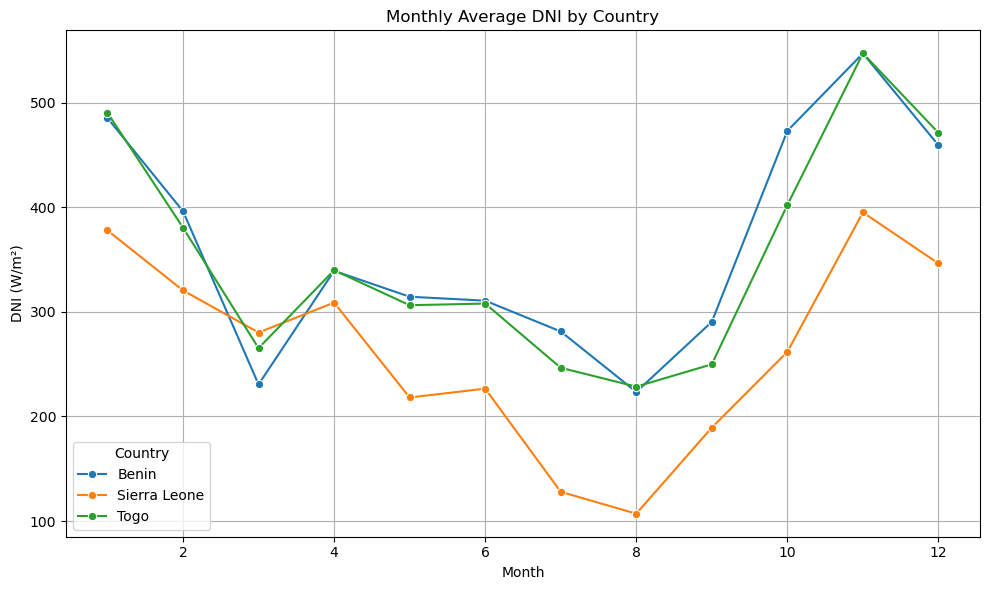

In [57]:
# Data cleaning function
def prepare_data(df, country_name):
    df = df.copy()
    df["Country"] = country_name
    df = df[["Timestamp", "GHI", "DNI", "DHI", "Country"]]
    # Remove negative values
    df = df[(df["GHI"] > 0) & (df["DNI"] > 0) & (df["DHI"] > 0)]
    df["Month"] = df["Timestamp"].dt.month
    return df

# Prepare datasets
benin_clean = prepare_data(benin_df, "Benin")
sierra_clean = prepare_data(sierra_df, "Sierra Leone")
togo_clean = prepare_data(togo_df, "Togo")

# Combine all data
combined_df = pd.concat([benin_clean, sierra_clean, togo_clean])

# Monthly averages
monthly_avg = combined_df.groupby(["Country", "Month"])[["GHI", "DNI", "DHI"]].mean().reset_index()

# Plot Monthly Average DNI
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x="Month", y="DNI", hue="Country", marker="o")
plt.title("Monthly Average DNI by Country")
plt.xlabel("Month")
plt.ylabel("DNI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')


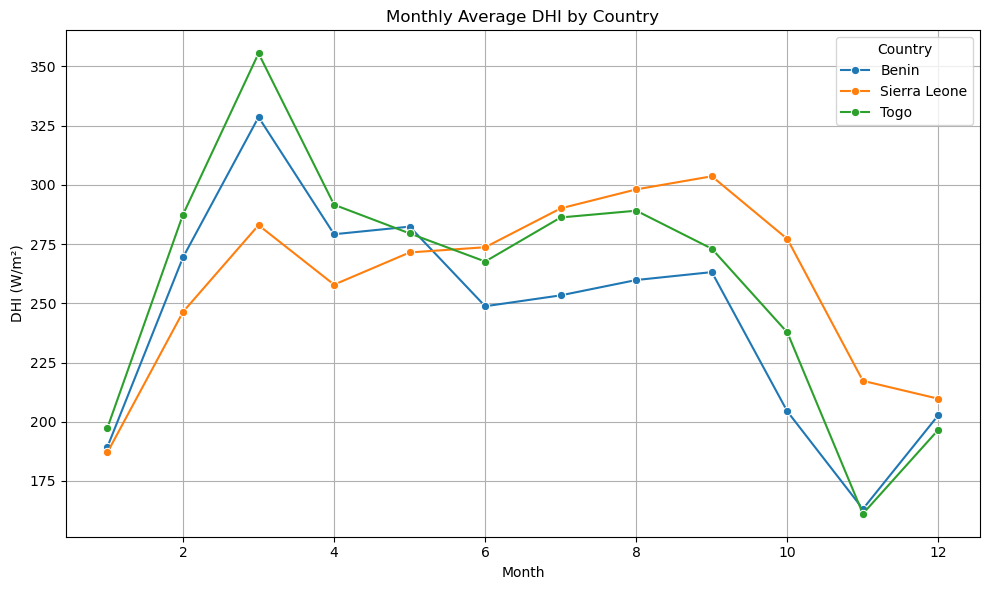

In [61]:
# Data cleaning function
def prepare_data(df, country_name):
    df = df.copy()
    df["Country"] = country_name
    df = df[["Timestamp", "GHI", "DNI", "DHI", "Country"]]
    # Remove negative values
    df = df[(df["GHI"] > 0) & (df["DNI"] > 0) & (df["DHI"] > 0)]
    df["Month"] = df["Timestamp"].dt.month
    return df

# Prepare datasets
benin_clean = prepare_data(benin_df, "Benin")
sierra_clean = prepare_data(sierra_df, "Sierra Leone")
togo_clean = prepare_data(togo_df, "Togo")

# Combine all data
combined_df = pd.concat([benin_clean, sierra_clean, togo_clean])

# Monthly averages
monthly_avg = combined_df.groupby(["Country", "Month"])[["GHI", "DNI", "DHI"]].mean().reset_index()

# Plot Monthly Average DHI
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x="Month", y="DHI", hue="Country", marker="o")
plt.title("Monthly Average DHI by Country")
plt.xlabel("Month")
plt.ylabel("DHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')


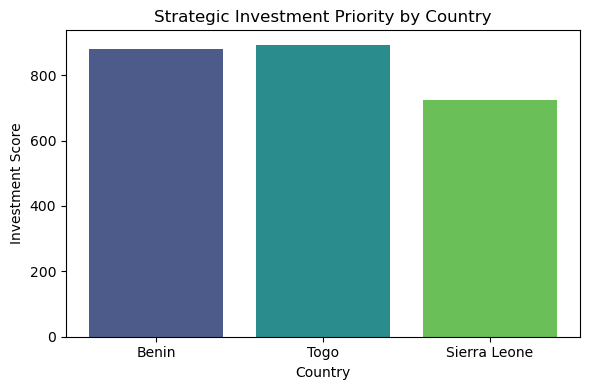

In [67]:
# Example investment scores (replace with actual computed values)
# Function to calculate score
def calculate_score(df):
    df = df[(df["GHI"] > 0) & (df["DNI"] > 0)]  # Remove invalid values
    avg_ghi = df["GHI"].mean()
    avg_dni = df["DNI"].mean()
    return avg_ghi + avg_dni

# Calculate scores
scores = {
    "Benin": calculate_score(benin),
    "Togo": calculate_score(togo),
    "Sierra Leone": calculate_score(sierra_leone)
}
#print(scores)

# Convert to DataFrame
df = pd.DataFrame(list(scores.items()), columns=["Country", "Investment Score"])

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(df["Country"], df["Investment Score"], color=["#4C5B8A", "#2A8C8C", "#6BBF59"])
plt.title("Strategic Investment Priority by Country")
plt.xlabel("Country")
plt.ylabel("Investment Score")
plt.tight_layout()
plt.show()


C:\Users\hanif\AppData\Local\Temp\ipykernel_26416\1914050560.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ghi, x='Country', y='GHI', palette='viridis')


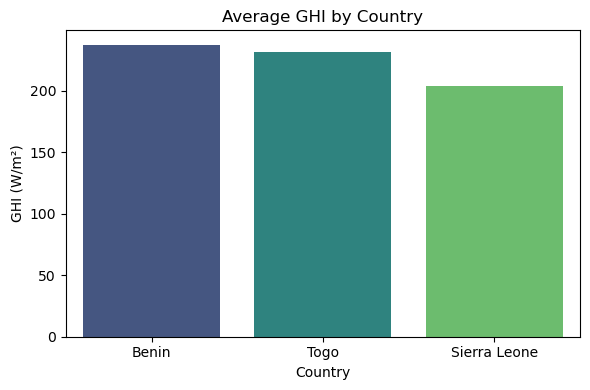

In [75]:
# Combine country data
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierra_leone], ignore_index=True)

# Calculate avg GHI per country
avg_ghi = (
    df_all.groupby('Country', as_index=False)['GHI']
          .mean()
          .sort_values('GHI', ascending=False)
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_ghi, x='Country', y='GHI', palette='viridis')
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()
